In [2]:
import json

from transformers import AutoTokenizer

In [16]:
with open('../dataset/train/train.json', 'r') as f:
    data = json.load(f)

In [17]:
len(data)

45353

In [18]:
model_name = "d:/model/Qwen/Qwen2___5-0___5B-Instruct/"
# model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [19]:
lens = []
for i in data:
    # print(len(tokenizer.encode(i['input']+i['output'])))
    lens.append(len(tokenizer.encode(i['input'] + i['output'])) // 100)

In [20]:
from collections import Counter

In [21]:
res = Counter(lens)

In [22]:
data_statics = []
for i in res:
    data_statics.append([i, res[i]])
data_statics.sort(key=lambda x: x[0])
data_statics

[[1, 7957],
 [2, 6842],
 [3, 6717],
 [4, 6575],
 [5, 6426],
 [6, 6276],
 [7, 3849],
 [8, 659],
 [9, 50],
 [10, 2]]

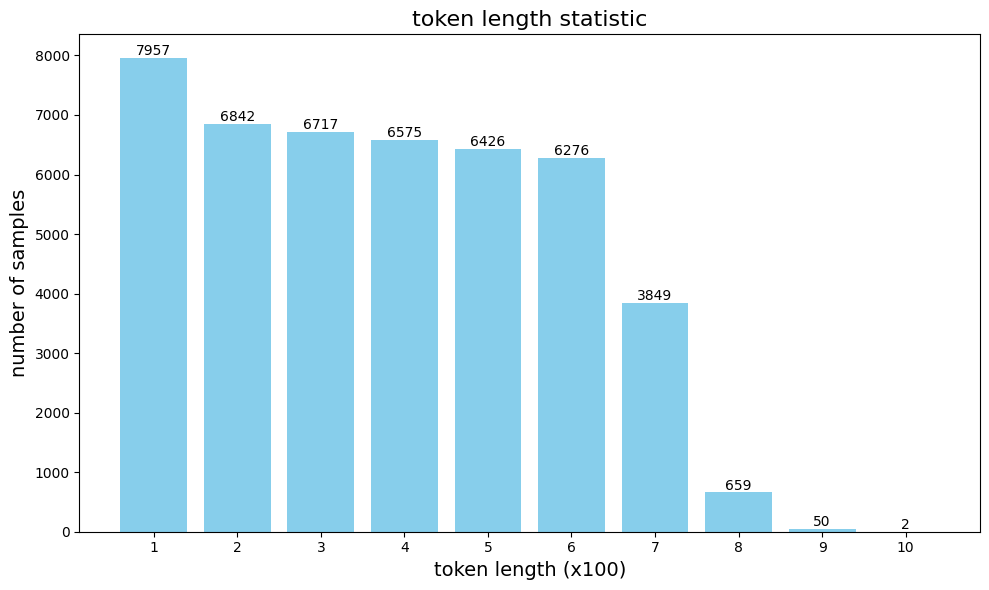

In [25]:
import matplotlib.pyplot as plt
import numpy as np

data_statics = np.array(data_statics)

# 提取键和值
keys = data_statics[:, 0]
values = data_statics[:, 1]

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(keys, values, color='skyblue')

# 设置标题和标签
plt.title('token length statistic', fontsize=16)
plt.xlabel('token length (x100)', fontsize=14)
plt.ylabel('number of samples', fontsize=14)

# 添加数值标签
for i, v in enumerate(values):
    plt.text(keys[i], v + 50, str(v), ha='center', fontsize=10)

# 显示图表
plt.xticks(keys)  # 设置 x 轴刻度
plt.tight_layout()
plt.savefig('./fig/token_length_statistic.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [26]:
def sample_data(data, min_len=0, max_len=1024):
    res = []
    for i in data:
        seq_len = len(tokenizer.encode(i['input'] + i['output']))
        if seq_len >= min_len and seq_len < max_len:
            res.append(i)
    return res

In [27]:
short_data = sample_data(data, 0, 300)
medium_data = sample_data(data, 300, 550)
long_data = sample_data(data, 550, 1100)

In [28]:
print(len(short_data), len(medium_data), len(long_data))
print(len(short_data) + len(medium_data) + len(long_data))

14799 16535 14019
45353


In [29]:
with open('../dataset/train/short.json', 'w') as f:
    json.dump(short_data, f)

with open('../dataset/train/medium.json', 'w') as f:
    json.dump(medium_data, f)

with open('../dataset/train/long.json', 'w') as f:
    json.dump(long_data, f)